In [1]:
!git clone https://github.com/Leejunho123/deep-learning-from-scratch-3.git
%cd /content/deep-learning-from-scratch-3

Cloning into 'deep-learning-from-scratch-3'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2101 (delta 0), reused 0 (delta 0), pack-reused 2097
Receiving objects: 100% (2101/2101), 32.30 MiB | 20.67 MiB/s, done.
Resolving deltas: 100% (1444/1444), done.
/content/deep-learning-from-scratch-3


## 57 conv2d 함수와 pooling 함수

### 57.1 im2col에 의한 전개

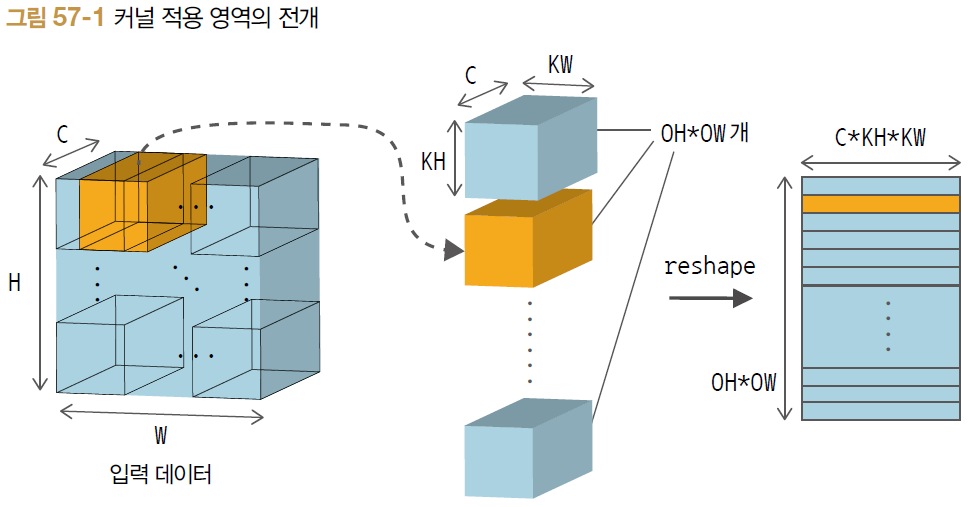

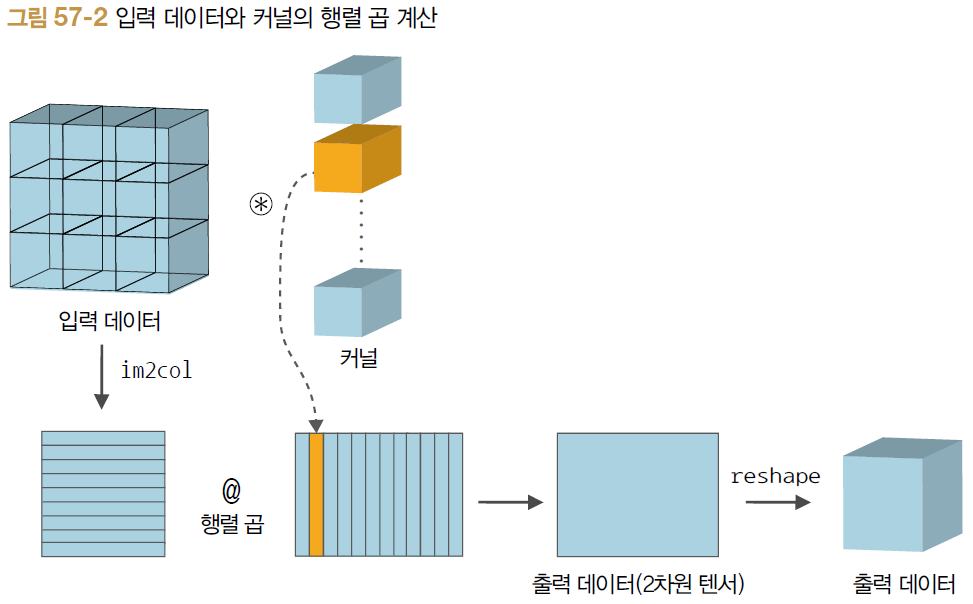

### 57.2 conv2d 함수 구현

In [3]:
import numpy as np
import dezero.functions as F

x1 = np.random.rand(1,3,7,7)
col1 = F.im2col(x1, kernel_size=5, stride=1, pad=0, to_matrix=True)
print(col1.shape)

x2 = np.random.rand(10,3,7,7)
kernel_size = (5,5)
stride = (1,1)
pad = (0,0)
col2 = F.im2col(x2, kernel_size, stride, pad, to_matrix=True)
print(col2.shape)

(9, 75)
(90, 75)


In [4]:
def pair(x):
  if isinstance(x, int):
    return (x,x)
  
  elif isinstance(x, tuple):
    assert len(x) == 2
    return x
  else:
    raise ValueError

In [5]:
from dezero.utils import pair

In [6]:
print(pair(1))
print(pair((1,2)))

(1, 1)
(1, 2)


In [7]:
from dezero.utils import pair, get_conv_outsize

def conv2d_simple(x, W, b=None, stride=1, pad=0):
  x, W = as_variable(x), as_variable(W)

  Weight = W
  N,C,H,W = x.shape
  OC, C, KH, KW = Weight.shape
  SH, SW = pair(stride)
  PH, PW = pair(pad)
  OH = get_conv_outsize(H, KH, SH, PH)
  OW = get_conv_outsize(W, KW, SW, PW)

  col = im2col(x, (KH, KW), stride, pad, to_matrix=True)
  Weight = Weight.reshape(OC, -1).transpose()
  t = linear(col, Weight, b)
  y = t.reshape(N, OH, OW, OC).transpose(0,3,1,2)

  return y

In [9]:
from dezero import Variable
N, C, H, W = 1, 5, 15, 15
OC, (KH, KW) = 8, (3,3)

x = Variable(np.random.randn(N,C,H,W))
W = np.random.rand(OC,C,KH,KW)
y = F.conv2d_simple(x, W, b=None, stride=1, pad=1)
y.backward()

print(y.shape)
print(x.grad.shape)

(1, 8, 15, 15)
(1, 5, 15, 15)


### 57.3 Conv2d 계층 구현

### 57.4 polling 함수 구현

In [10]:
def pooling_simple(x, kernel_size, stride=1, pad=0):
  x = as_variable(x)

  N, C, H, W = x.shape
  KH, KW = pair(kernel_size)
  PH, PW = pair(pad)
  SH, SW = pair(stride)
  OH = get_conv_outsize(H,KH,SH,PH)
  OW = get_conv_outsize(W,KW,SW,PW)

  col = im2col(x, kernel_size, stride, pad, to_matrix=True)
  col = col.reshape(-1, KH * KW)
  y = col.max(axis=1)
  y = y.reshape(N,OH,OW,C).transpose(0,3,1,2)
  return y